<a href="https://colab.research.google.com/github/mateetshepo/Fraud-Detection-Challenge-/blob/master/MM_FraudDetection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import python liraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
#from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

Load datasets

In [0]:
train = pd.read_csv('training.csv')

In [0]:
test = pd.read_csv('test.csv')

In [0]:
definitions = pd.read_csv('Xente_Variable_Definitions.csv')

In [0]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [0]:
definitions.values

array([['TransactionId', 'Unique �transaction identifier on platform'],
       ['BatchId',
        'Unique number assigned to a batch of transactions for processing'],
       ['AccountId',
        'Unique number identifying the customer on platform'],
       ['SubscriptionId',
        'Unique number identifying the customer subscription'],
       ['CustomerId', 'Unique identifier attached to Account'],
       ['CurrencyCode', 'Country currency'],
       ['CountryCode', 'Numerical geographical code of country'],
       ['ProviderId', 'Source provider of Item �bought.'],
       ['ProductId', 'Item name being bought.'],
       ['ProductCategory',
        'ProductIds are organized into these broader product categories.'],
       ['ChannelId',
        'Identifies if customer used web,Android, IOS, pay later or checkout.'],
       ['Amount',
        'Value of the transaction. Positive for debits from customer account and negative for credit into customer account'],
       ['Value', 'Absolute

In [0]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


**Exploratory Data Analysis**

In [0]:
train.shape

(95662, 16)

In [0]:
test.shape #excludes target variable column

(45019, 15)

In [0]:
train.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [0]:
#check for missing values
train.isnull().sum().max()

0

In [0]:
train.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [0]:
print('No Fraud:', round(train['FraudResult'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Fraud:', round(train['FraudResult'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

#only a small percentage of our dataset comprises fraudulent transactions

No Fraud: 99.8 % of the dataset
Fraud: 0.2 % of the dataset


Text(0.5, 1.0, 'Fraud Distribution \n (0: No Fraud || 1: Fraud)')

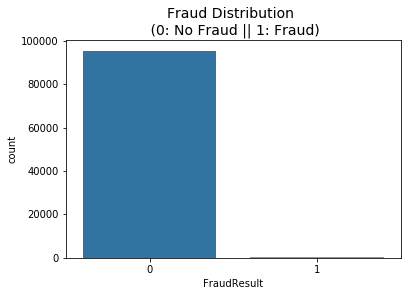

In [0]:
#visualise distribution of fraudulent and non-fraudulent transactions
sns.countplot('FraudResult', data=train)
plt.title('Fraud Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)

Which transactions have are the most fraudulent?

In [0]:

print('\n The types of fraudulent transactions are {}'.format(\
list(train.loc[train.FraudResult == 1].ProductCategory.drop_duplicates().values)))



 The types of fraudulent transactions are ['financial_services', 'airtime', 'utility_bill', 'transport']


**Data Cleaning**

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


Transform categorical data from strings to numeric data

In [0]:
train['TransactionStartTime'] = train['TransactionStartTime'].astype(str)
test['TransactionStartTime'] = test['TransactionStartTime'].astype(str)

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#data = train.loc['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']
#values = array(data)
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(data)

#data.apply(LabelEncoder().fit_transform)

In [0]:
columns = ('BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime')

for col in columns:
    label = LabelEncoder() 
    label.fit(list(train[col].values)) 
    train[col] = label.transform(list(train[col].values))

In [0]:
columns = ('BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime')

for col in columns:
    label = LabelEncoder() 
    label.fit(list(test[col].values)) 
    test[col] = label.transform(list(test[col].values))

In [0]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(sparse=False)

#train['TransactionId'] = train['TransactionId'].astype(str)
#test['TransactionId'] = test['TransactionId'].astype(str)

In [0]:
#onehotencoder.fit_transform(list(train.TransactionId.values))
#onehotencoder.fit_transform(test['TransactionId'])

TransactionId was not encoded because string format is required in order to make a submission

In [0]:
train.head() 

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,46980,2490,3535,2584,0,256,5,1,0,2,1000.0,1000,0,2,0
1,TransactionId_73770,31755,3219,2366,2584,0,256,3,19,2,1,-20.0,20,1,2,0
2,TransactionId_26203,60272,2713,996,2806,0,256,5,0,0,2,500.0,500,2,2,0
3,TransactionId_380,1797,3351,974,3733,0,256,0,11,8,2,20000.0,21800,3,2,0
4,TransactionId_28195,48941,3219,2366,3733,0,256,3,19,2,1,-644.0,644,4,2,0


**Model Fitting and Accuracy Check: Using Resampling Methods**

In [0]:
#X = train.loc[(train.ProductCategory == 'financial_services') | (train.ProductCategory == 'airtime') | (train.ProductCategory == 'utility_bill') | (train.ProductCategory == 'transport')]
#X = train.drop(['FraudResult'],axis=1)
#y = train['FraudResult']

# Define a random state 
#state = np.random.RandomState(42) 'TransactionId'

**Oversample Minority Class**

In [0]:
from sklearn.utils import resample
y = train.FraudResult
X = train.drop(['FraudResult', 'TransactionId'], axis=1)

In [0]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.FraudResult==0]
fraud = X[X.FraudResult==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.FraudResult.value_counts()


1    71605
0    71605
Name: FraudResult, dtype: int64

Logistic Regression

In [0]:
y_train = upsampled.FraudResult
X_train = upsampled.drop(['FraudResult'], axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [0]:
accuracy_score(y_test, upsampled_pred)

0.9900066900819535

In [0]:
f1_score(y_test, upsampled_pred)

0.2949852507374631

In [0]:
recall_score(y_test, upsampled_pred)

0.9615384615384616

Random Forest

In [0]:
clf2 = RandomForestClassifier()
upsampled2 = clf2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
upsampled2_pred = upsampled2.predict(X_test)

In [0]:
accuracy_score(y_test, upsampled2_pred)

0.9994146178290684

In [0]:
f1_score(y_test, upsampled2_pred)

0.8703703703703703

In [0]:
recall_score(y_test, upsampled2_pred)

0.9038461538461539

**Undersample majority class**

In [0]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.FraudResult.value_counts()

1    141
0    141
Name: FraudResult, dtype: int64

Logistic Regression

In [0]:
y_train = downsampled.FraudResult
X_train = downsampled.drop(['FraudResult'], axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [0]:
accuracy_score(y_test, undersampled_pred)

0.9866616491052015

In [0]:
f1_score(y_test, undersampled_pred)

0.24228028503562943

Random Forest

In [0]:
clf3 = RandomForestClassifier()
undersampled2 = clf3.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
undersampled2_pred = undersampled2.predict(X_test)

In [0]:
accuracy_score(y_test, undersampled2_pred)

0.9902993811674193

In [0]:
f1_score(y_test, undersampled2_pred)

0.30538922155688625

**Model Fitting and Accuracy Check: Without Resampling**

In [0]:
#from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

#train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
#train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [0]:
#from sklearn.model_selection import train_test_split

#train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Classifiers

In [0]:
#X_outliers = state.uniform(low=-4, high=4, size=(X.shape[0], X.shape[1]))

Isolation Forest

In [0]:
from sklearn.ensemble import IsolationForest
clf1 = IsolationForest()
clf1.fit(train_df[predictors], train_df[target].values)

#clf.fit(train_df[predictors], train_df[target].values)
#y_pred = clf.predict()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [0]:
preds1 = clf1.predict(valid_df[predictors])

#preds = clf.predict(valid_df[predictors])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [0]:
preds1

array([ 1, -1,  1, ...,  1,  1,  1])

In [0]:
#print(classification_report(valid_df[target], pred1))
print(classification_report(valid_df[target].values, preds1))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     15269
           1       0.00      0.08      0.00        37

    accuracy                           0.00     15306
   macro avg       0.00      0.03      0.00     15306
weighted avg       0.00      0.00      0.00     15306



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

Random Forest Classifier

In [0]:
#clf2 = RandomForestClassifier(n_jobs=4, 
#                             random_state=2018,
#                             criterion='gini',
#                             n_estimators=100,
#                             verbose=False)

clf2 = RandomForestClassifier()

In [0]:
clf2.fit(train_df[predictors], train_df[target].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
preds2 = clf2.predict(valid_df[predictors])

In [0]:
print(classification_report(valid_df[target].values, preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.91      0.81      0.86        37

    accuracy                           1.00     15306
   macro avg       0.95      0.91      0.93     15306
weighted avg       1.00      1.00      1.00     15306



AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

clf3 = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

In [0]:
clf3.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2018)

In [0]:
preds3 = clf3.predict(valid_df[predictors])

In [0]:
print(classification_report(valid_df[target].values, preds3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.94      0.78      0.85        37

    accuracy                           1.00     15306
   macro avg       0.97      0.89      0.93     15306
weighted avg       1.00      1.00      1.00     15306



**Submission**

In [0]:
#ID = train['TransactionId']

#newdf = (pd.merge(df1, df2, left_on='id', right_on='id1', how='left').drop('id1', axis=1))

#valid_df

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [0]:
df1 = pd.DataFrame({'FraudResult': upsampled2_pred})

In [0]:
result = test.append(df1, sort=True)

In [0]:
df = result[['TransactionId', 'FraudResult']]

In [0]:
#df2 = pd.concat([test,df1], axis=1, join='outer', ignore_index=False, verify_integrity=True, sort=False, join_axes=[test.index])
#df2 = pd.merge(test, df1,on='BatchId', how='inner')
#pd.melt(df, id_vars =['Name'], value_vars =['Course']) 

In [0]:
df1.head()

,FraudResult
0,0
1,0
2,0
3,0
4,0


In [0]:
#df3 = df2[['TransactionId', 'FraudResult']]

#df3 = pd.concat([test,df2], axis=1, join='inner', ignore_index=False, verify_integrity=True, sort=False)

#df4 = pd.merge(test,df3, on='BatchId', how='right')
#df.to_csv('rf.csv', index = False)

#df2 = pd.concat([test,df1], axis=1, join='inner', ignore_index=False, verify_integrity=True, sort=False)

#sample = pd.read_csv('sample_submission.csv')

In [0]:
#df4 = pd.melt(df3, id_vars =['TransactionId'], value_vars =['FraudResult']) 

In [0]:
df.to_csv('lol.csv', index = False)

In [0]:
df.head()

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN


**References**:
    - https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
    - https://medium.com/coinmonks/handling-imbalanced-datasets-predicting-credit-card-fraud-544f5e74e0fd 
    - https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models
    - https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services 


    